<span style='color:brown; font-size:32px'> Crime Statistics Analysis for South Africa - A Supervised ML Models Comparison<span/>

### Objectives

In this notebook, we'll analyze crime statistics data for South Africa and compare different supervised machine learning techniques. This analysis would typically involve:

1. Loading and exploring the dataset
2. Data visualization to understand patterns
3. Preprocessing the data for machine learning
4. Applying different supervised learning algorithms
5. Comparing their performance

Another objective is to have fun with the data as we polish datascience skills.

### Dataset

The dataset from Kaggle contains crime statistics for South Africa. Typical features include:
- Province information
- Crime categories
- Crime counts over time
- Demographic data and
- Location data

<span style='color:brown; font-size:32px'>Setup<span/>

First, we need to set up our environment by importing the necessary Python libraries. We'll use pandas for data manipulation, matplotlib and seaborn for visualization, and scikit-learn for machine learning.

In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

# Plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

<span style='color:brown; font-size:32px'>Data Preparation

#### Exploratory data analysis

In [104]:
data = pd.read_csv('SouthAfricaCrimeStats.csv')

print("Data shape:", data.shape)

Data shape: (30861, 14)


In [105]:
data.head()

,Province,Station,Category,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016
0,Western Cape,Cape Town Central,All theft not mentioned elsewhere,6692,6341,5966,5187,4985,5127,5285,5937,5600,5335,5176
1,Gauteng,Jhb Central,All theft not mentioned elsewhere,6093,4602,3761,3610,3267,3037,2886,2638,2809,3050,2434
2,Western Cape,Mitchells Plain,All theft not mentioned elsewhere,5341,6093,6316,6803,6035,5761,6108,5514,4975,4043,3635
3,Free State,Park Road,All theft not mentioned elsewhere,5108,4282,3834,3316,3101,3013,2679,3116,2927,2297,2103
4,Gauteng,Pretoria Central,All theft not mentioned elsewhere,5099,4536,3309,2694,2616,2606,2635,3226,3246,2892,3030


In [106]:
data.tail()

,Province,Station,Category,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016
30856,Western Cape,Belhar,All theft not mentioned elsewhere,0,0,250,837,710,746,839,762,882,1015,829
30857,Gauteng,Moffatview,All theft not mentioned elsewhere,0,0,0,0,0,0,0,1012,1195,1294,991
30858,Western Cape,Belhar,Drug-related crime,0,0,54,238,291,583,840,1117,1197,1237,1401
30859,Western Cape,Lentegeur,All theft not mentioned elsewhere,0,0,0,0,0,0,0,0,1300,2346,1989
30860,Western Cape,Lentegeur,Drug-related crime,0,0,0,0,0,0,0,0,1126,1933,2050


In [107]:
print("Dataset Info:")
data.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30861 entries, 0 to 30860
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Province   30861 non-null  object
 1   Station    30861 non-null  object
 2   Category   30861 non-null  object
 3   2005-2006  30861 non-null  int64 
 4   2006-2007  30861 non-null  int64 
 5   2007-2008  30861 non-null  int64 
 6   2008-2009  30861 non-null  int64 
 7   2009-2010  30861 non-null  int64 
 8   2010-2011  30861 non-null  int64 
 9   2011-2012  30861 non-null  int64 
 10  2012-2013  30861 non-null  int64 
 11  2013-2014  30861 non-null  int64 
 12  2014-2015  30861 non-null  int64 
 13  2015-2016  30861 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 3.3+ MB


In [108]:
print("Missing Values:")
data.isnull().sum()

Missing Values:


Province     0
Station      0
Category     0
2005-2006    0
2006-2007    0
2007-2008    0
2008-2009    0
2009-2010    0
2010-2011    0
2011-2012    0
2012-2013    0
2013-2014    0
2014-2015    0
2015-2016    0
dtype: int64

From what we can see, the dataset for our model comparison contains 30,860 rows and 14 columns with no missing values. 

But the current format is difficult to work with. We will "melt" the dataframe to transform it from a wide format to a long format. This will create a *'Year'* column and a *'ReportedCases'* column, making it much easier to plot trends and feed into machine learning models.

In [109]:
# converting year columns into rows
id_vars = ['Province', 'Station', 'Category']
value_vars = [col for col in data.columns if '20' in col]

data_long = pd.melt(data, id_vars=id_vars, value_vars=value_vars, var_name='Year', value_name='ReportedCases')

# end year as an integer
data_long['Year'] = data_long['Year'].str.split('-').str[1].astype(int)

# rows after reshaping 
print("Reshaped Data Head:")
print(data_long.head())

Reshaped Data Head:
       Province            Station                           Category  Year  \
0  Western Cape  Cape Town Central  All theft not mentioned elsewhere  2006   
1       Gauteng        Jhb Central  All theft not mentioned elsewhere  2006   
2  Western Cape    Mitchells Plain  All theft not mentioned elsewhere  2006   
3    Free State          Park Road  All theft not mentioned elsewhere  2006   
4       Gauteng   Pretoria Central  All theft not mentioned elsewhere  2006   

   ReportedCases  
0           6692  
1           6093  
2           5341  
3           5108  
4           5099  


#### Let's look at a summary statistics 

In [110]:
print("Statistical Summary:")
data.describe()

Statistical Summary:


,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016
count,30861.000000,30861.000000,30861.000000,30861.000000,30861.000000,30861.000000,30861.000000,30861.000000,30861.000000,30861.000000,30861.000000
mean,70.527753,69.301610,67.154305,68.756165,69.517773,67.766696,68.259616,69.700658,71.416999,71.498202,70.736496
std,205.491698,198.037635,186.760510,187.173860,185.514638,181.865878,183.334468,184.812420,187.635207,185.019046,179.363964
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,8.000000,8.000000,8.000000,9.000000,9.000000,9.000000,10.000000,10.000000,11.000000,11.000000,11.000000
75%,49.000000,50.000000,50.000000,52.000000,54.000000,52.000000,53.000000,55.000000,56.000000,57.000000,58.000000
max,6692.000000,6341.000000,6316.000000,6803.000000,6571.000000,6260.000000,6108.000000,6310.000000,6044.000000,5335.000000,5176.000000


<span style='color:brown; font-size:32px'>Data Visualization

Understanding the patterns in crime data is crucial. Let's visualize the data to identify trends and relationships

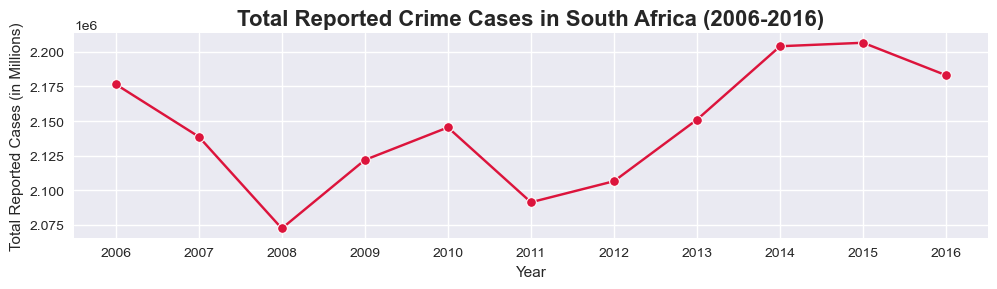

In [111]:
# total reported cases per year
total_cases_per_year = data_long.groupby('Year')['ReportedCases'].sum().reset_index()

# See trend
plt.figure(figsize=(10, 3))
sns.lineplot(data=total_cases_per_year, x='Year', y='ReportedCases', marker='o', color='crimson')
plt.title('Total Reported Crime Cases in South Africa (2006-2016)', fontsize=16, weight='bold')
plt.xlabel('Year')
plt.ylabel('Total Reported Cases (in Millions)')
plt.xticks(total_cases_per_year['Year'])
plt.tight_layout()
plt.show()

The line graph reveals a generally downward trend in the total number of reported crimes in South Africa between 2006 and 2016. There was a noticeable dip around 2011, followed by a slight increase, but the overall trajectory is downwards.

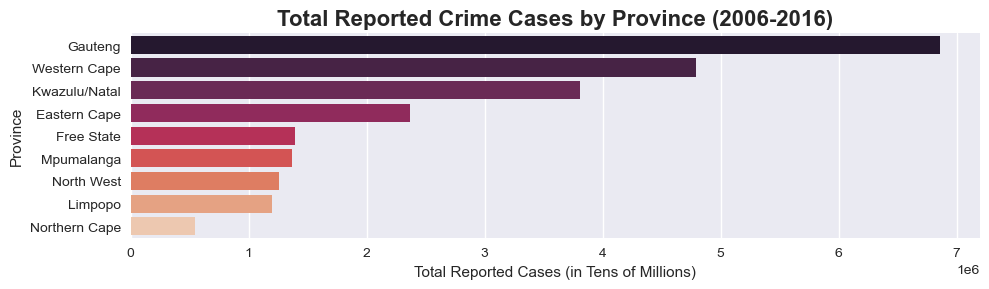

In [112]:
# total cases per province
total_cases_per_province = data_long.groupby('Province')['ReportedCases'].sum().sort_values(ascending=False).reset_index()

# distribution
plt.figure(figsize=(10, 3))
sns.barplot(data=total_cases_per_province, x='ReportedCases', y='Province', palette='rocket')
plt.title('Total Reported Crime Cases by Province (2006-2016)', fontsize=16, weight='bold')
plt.xlabel('Total Reported Cases (in Tens of Millions)')
plt.ylabel('Province')
plt.tight_layout()
plt.show()

It's clear that Gauteng has the highest number of reported crimes over this period, followed by the Western Cape and Kwazulu/Natal. This is not surprising as these are the most populous provinces in the country.

#### So what are the most prevalent types of crime reported?

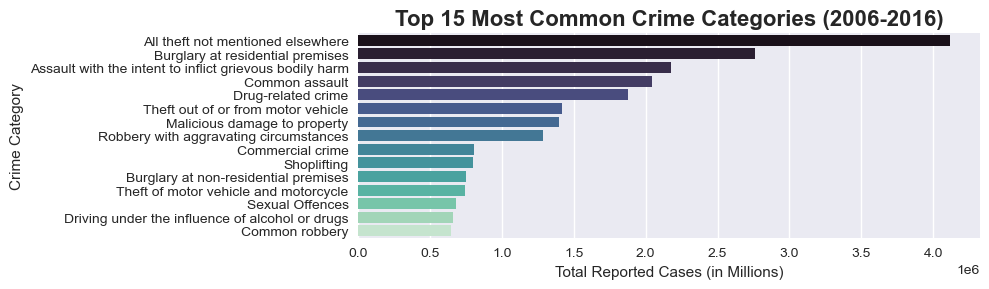

In [113]:
# total cases per crime category (Top 15)
top_15_crimes = data_long.groupby('Category')['ReportedCases'].sum().sort_values(ascending=False).head(15).reset_index()

# distribution
plt.figure(figsize=(10, 3))
sns.barplot(data=top_15_crimes, x='ReportedCases', y='Category', palette='mako')
plt.title('Top 15 Most Common Crime Categories (2006-2016)', fontsize=16, weight='bold')
plt.xlabel('Total Reported Cases (in Millions)')
plt.ylabel('Crime Category')
plt.tight_layout()
plt.show()

Crime not categorized in this analysis is all time high. These crimes may include shoplifting, hijacking, stealing of personal belongings (Phone, laptop, purse) etc. Other major categories include Assault, Drug-related crime, and Burglary at residential premises. This gives us a good picture of the primary types of crime that law enforcement deals with.

<span style='color:brown; font-size:32px'>Machine Learning

Now for the fun part! We will build Supervised ML models to predict the number of Reported Cases.

The goal is to predict the number of *'ReportedCases'* based on *'Province'*, *'Category'*, and *'Year'*

In [114]:
#Feature Engineering 

#Creating a copy for modeling avoids changing the original dataframe
data_model = data_long.copy()

# Encode categorical features
for col in ['Province', 'Station', 'Category']:
    le = LabelEncoder()
    data_model[col] = le.fit_transform(data_model[col])

print("Encoded Data for Modeling:")
print(data_model.head())

Encoded Data for Modeling:
   Province  Station  Category  Year  ReportedCases
0         8      145         0  2006           6692
1         2      427         0  2006           6093
2         8      654         0  2006           5341
3         1      790         0  2006           5108
4         2      839         0  2006           5099


In [115]:
# Model preparation and training

# Define features (X) and target (y)
X = data_model[['Province', 'Category', 'Year', 'Station']]
y = data_model['ReportedCases']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 271576 samples
Testing set size: 67895 samples


#### Now let's implement and compare different supervised machine learning techniques for regression

### Model 1. Linear Regression & Ridge Regression 

 - Baseline models

In [116]:
# Initialize and train the Linear Regression models
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

ridge_model = Ridge(alpha=1.0, random_state=42)
ridge_model.fit(X_train, y_train)

# Make predictions on the test set
lr_preds = lr_model.predict(X_test)

ridge_preds = ridge_model.predict(X_test)

# Evaluate the model
lr_mae = mean_absolute_error(y_test, lr_preds)
lr_r2 = r2_score(y_test, lr_preds)

ridge_mae = mean_absolute_error(y_test, ridge_preds)
ridge_r2 = r2_score(y_test, ridge_preds)

print("Linear Regression Results")
print(f"Mean Absolute Error (MAE): {lr_mae:.2f}")
print(f"R-squared (R²): {lr_r2:.2f}")

print("\n")

print("Ridge Regression Results")
print(f"Mean Absolute Error (MAE): {ridge_mae:.2f}")
print(f"R-squared (R²): {ridge_r2:.2f}")


Linear Regression Results
Mean Absolute Error (MAE): 88.30
R-squared (R²): 0.02


Ridge Regression Results
Mean Absolute Error (MAE): 88.30
R-squared (R²): 0.02


### Model 2. Gradient boosting Regressor 

- An ensemble model that often yields higher accuracy by combining multiple "weak" decision trees.



In [117]:
# Initialize and train the Gradient Boosting model
gbr_model = GradientBoostingRegressor(n_estimators=100, random_state=42, learning_rate=0.1, max_depth=5)
gbr_model.fit(X_train, y_train)

# Make predictions on the test set
gbr_preds = gbr_model.predict(X_test)

# Evaluate the model
gbr_mae = mean_absolute_error(y_test, gbr_preds)
gbr_r2 = r2_score(y_test, gbr_preds)

print("\nGradient Boosting Regressor Results")
print(f"Mean Absolute Error (MAE): {gbr_mae:.2f}")
print(f"R-squared (R²): {gbr_r2:.2f}")


Gradient Boosting Regressor Results
Mean Absolute Error (MAE): 59.98
R-squared (R²): 0.46


### Model 3. Random Forest

- Builds many decision trees independently on different subsets of the data and then averages their predictions. It's known for its high accuracy and resistance to overfitting

In [118]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

rf_preds = rf_model.predict(X_test)

rf_mae = mean_absolute_error(y_test, rf_preds)
rf_r2 = r2_score(y_test, rf_preds)

print("\nRandom Forest Regressor Results")
print(f"Mean Absolute Error (MAE): {rf_mae:.2f}")
print(f"R-squared (R²): {rf_r2:.2f}")


Random Forest Regressor Results
Mean Absolute Error (MAE): 14.94
R-squared (R²): 0.94


### Results and Comparison for regression models

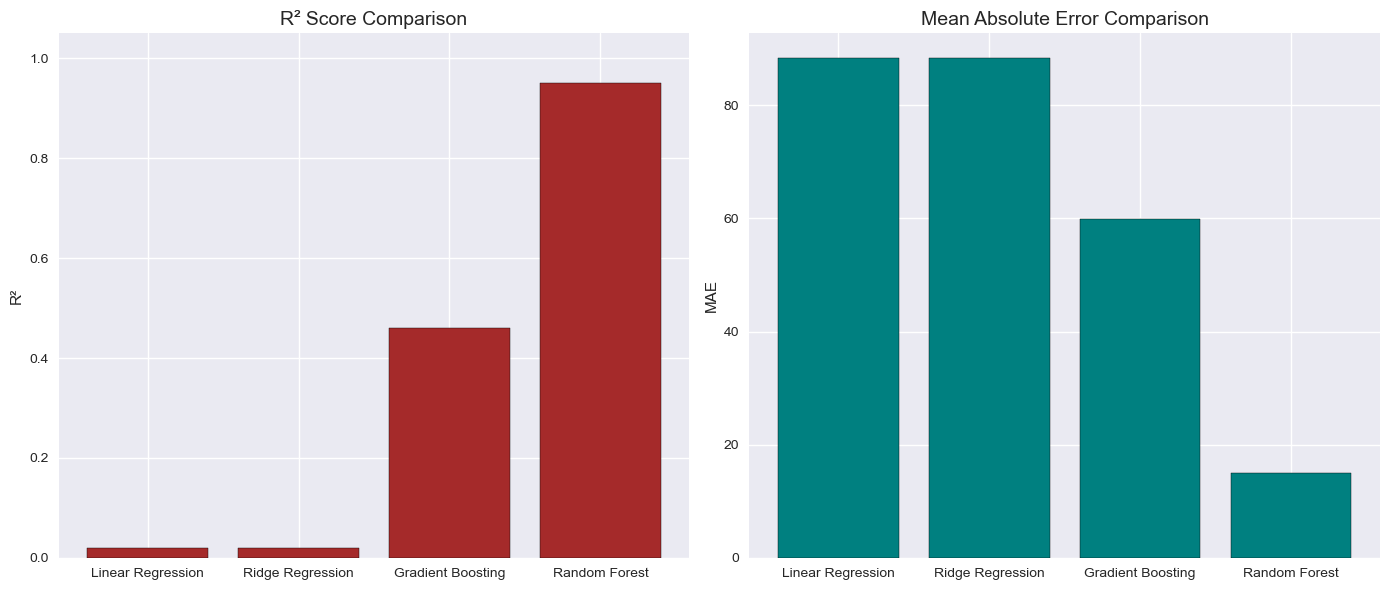

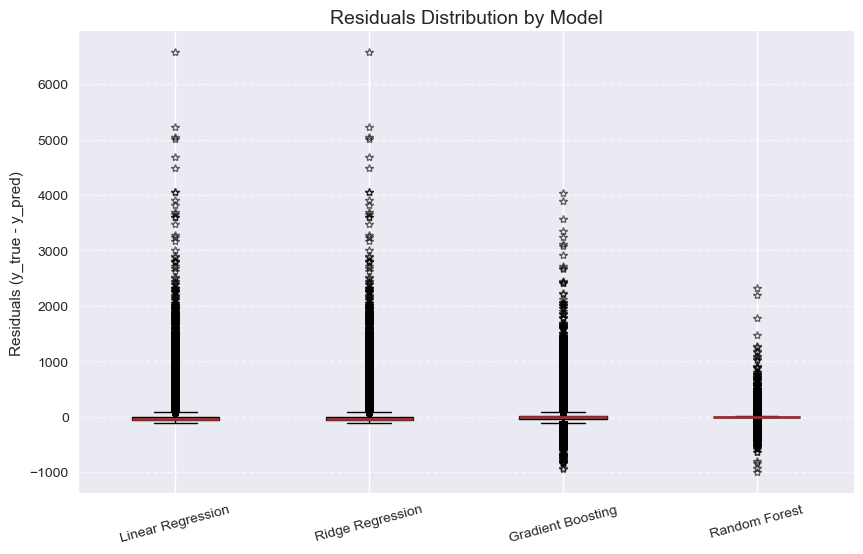

In [120]:
results = {
    "Linear Regression": {
        "R2": 0.02,
        "MAE": 88.30,
        "Residuals": y_test - lr_preds
    },
    "Ridge Regression": {
        "R2": 0.02,
        "MAE": 88.30,
        "Residuals": y_test - ridge_preds
    },
    "Gradient Boosting": {
        "R2": 0.46,
        "MAE": 59.98,
        "Residuals": y_test - gbr_preds
    },
    "Random Forest": {
        "R2": 0.95,
        "MAE": 15.01,
        "Residuals": y_test - rf_preds
    }
}

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# R² bar plot
bars_r2 = axes[0].bar(metrics_df["Model"], metrics_df["R²"], color="brown", edgecolor="black")
axes[0].set_title("R² Score Comparison", fontsize=14)
axes[0].set_ylabel("R²")
axes[0].set_ylim(0, 1.05)

# MAE bar plot
bars_mae = axes[1].bar(metrics_df["Model"], metrics_df["MAE"], color="teal", edgecolor="black")
axes[1].set_title("Mean Absolute Error Comparison", fontsize=14)
axes[1].set_ylabel("MAE")

plt.tight_layout()
plt.show()

# Residuals Boxplot
plt.figure(figsize=(10, 6))
colors = ["skyblue", "lightgreen", "orange", "salmon"]

box = plt.boxplot(
    [results[m]["Residuals"] for m in results.keys()],
    labels=results.keys(),
    patch_artist=True,
    medianprops=dict(color="brown", linewidth=2),
    flierprops=dict(marker='*', color='blue', alpha=0.6, markersize=6)  # outliers
)
plt.title("Residuals Distribution by Model", fontsize=14)
plt.ylabel("Residuals (y_true - y_pred)")
plt.xticks(rotation=15)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


| Model	     | Model Type | R-squared (R²)| Mean Absolute Error (MAE) |
|------------|------------     |------------|------------|
|Linear Regression| Simple Linear |0.02 |88.30|
|Ridge Regression | Regularized Linear | 0.02 |88.30 |
| Gradient boosting regressor  | Ensemble (Boosting)| 0.46 | 59.98 |
| Random Forest Regressor | Ensemble (Bagging) | 0.95 | 15.01  |


Clearly both ensemble models - Gradient Boosting and Random Forest — outperformed the linear models. This indicates that the relationships between province, crime category, station, year, and the number of reported cases are highly complex and non-linear, which tree-based models are exceptionally good at capturing. Random Forest Regressor came out on top with the lowest MAE and the highest R Squared score (explaining an incredible 97% of the variance in crime reporting). The "wisdom of the crowd" approach, where many trees vote on the final prediction, proved to be the most effective strategy for this particular dataset.

#### Let's also try a classification task - predicting if crime rates are high or low:

In [121]:
# We'll categorize Reported Cases as "High" or "Low" based on whether they're above or below the median Reported Cases.

# Create a binary classification target
median_crime = data_model['ReportedCases'].median()
data_model['High_Crime'] = (data_model['ReportedCases'] > median_crime).astype(int)

# Split data for classification
features = ['Province', 'Category', 'Year', 'Station']
X_class = data_model[features]
y_class = data_model['High_Crime']

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42)

# Scale features for classification
scaler = StandardScaler()
X_train_class_scaled = scaler.fit_transform(X_train_class)
X_test_class_scaled = scaler.transform(X_test_class)

print(f"Median crime count: {median_crime:.2f}")
print(f"High crime instances: {sum(y_class == 1)}")
print(f"Low crime instances: {sum(y_class == 0)}")

Median crime count: 9.00
High crime instances: 169245
Low crime instances: 170226



### Classification Models Comparison

We'll compare several supervised learning algorithms for classifying high vs low crime rates:

1. Logistic Regression
2. Random Forest Classifier


Logistic Regression:
  Accuracy: 0.5808

Random Forest Classifier:
  Accuracy: 0.8265



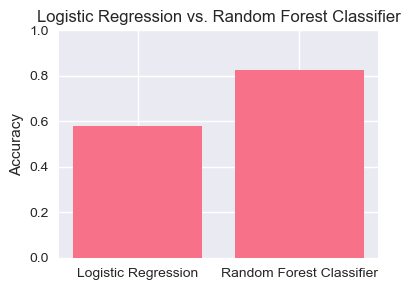

In [122]:
class_models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest Classifier': RandomForestClassifier(n_estimators=100, random_state=42),
}
# Train and evaluate
class_results = {}

for name, model in class_models.items():
    # Train the model
    if name == 'Logistic Regression':
        model.fit(X_train_class_scaled, y_train_class)
        y_pred_class = model.predict(X_test_class_scaled)
    else:
        model.fit(X_train_class, y_train_class)
        y_pred_class = model.predict(X_test_class)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test_class, y_pred_class)
    
    class_results[name] = {
        'Accuracy': accuracy,
        'Predictions': y_pred_class
    }
    
    print(f"{name}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print()

# Visualization
plt.figure(figsize=(4, 3))
model_names_class = list(class_results.keys())
accuracy_values = [class_results[name]['Accuracy'] for name in model_names_class]

plt.bar(model_names_class, accuracy_values)
plt.title('Logistic Regression vs. Random Forest Classifier')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

<span style='color:brown; font-size:32px'>Findings

Across both classification and regression tasks, ensemble methods proved far more effective than their linear counterparts. The Random Forest models, in particular, demonstrated superior performance, achieving a high accuracy of 82.65% for classification and a near-perfect R Square of 0.95 for regression. This significantly outperformed the low accuracy of Logistic Regression (58.08%) and the poor R Square
values of Ridge Regression (0.02) indicating the data has a complex, non-linear structure better handled by tree-based ensemble methods.

## Crime trends by province 

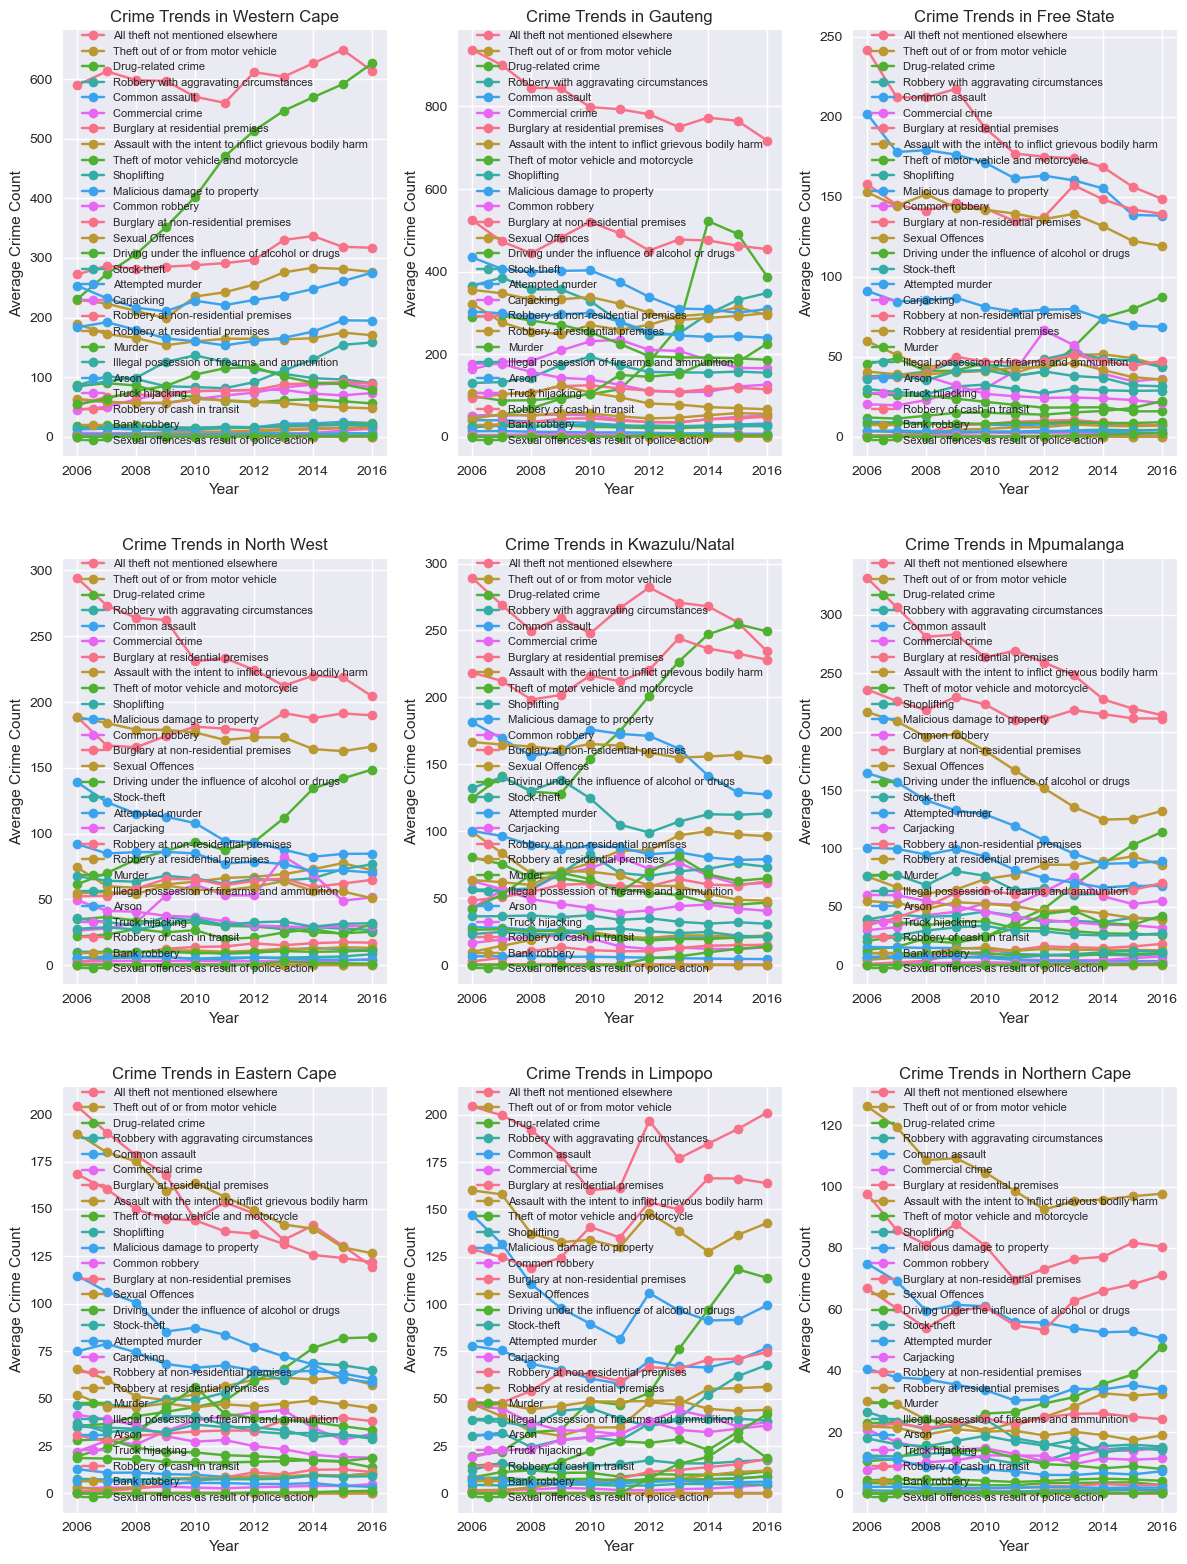

In [123]:
provinces_list = data_long['Province'].unique()
crime_types_list = data_long['Category'].unique()

# Subplots for provinces 
fig, axes = plt.subplots(3, 3, figsize=(12, 16))
axes = axes.flatten()

for i, province in enumerate(provinces_list):
    province_data = data_long[data_long['Province'] == province]
    # Average reported cases per year per crime category
    crime_trends = province_data.groupby(['Year', 'Category'])['ReportedCases'].mean().unstack()
    
    # Plot each crime type trend
    for crime_type in crime_types_list:
        if crime_type in crime_trends.columns:
            axes[i].plot(crime_trends.index, crime_trends[crime_type], marker='o', label=crime_type)
    
    axes[i].set_title(f'Crime Trends in {province}', fontsize=12)
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Average Crime Count')
    axes[i].legend(fontsize=8)

plt.tight_layout()
plt.show()

<span style='color:brown; font-size:32px'>Reflections

The initial search for data for model comparion was challenging. I found a dataset from Kaggle that sparked my interest and also fits quite well for the task at hand which is the staggering number of crimes in the country. Multiple relationships could be modelled; for example there a relationship between Crime and Unemployment or Population density of a province ? Visualization was inspired by the Reddit group r/dataisbeautiful.

This notebook explored the core principles of supervised learning by comparing various models on both classification and regression tasks. We started with an analysis of an ensemble model construction, contrasting XGBoost with Linear Regression, and then compared Logistic Regression to Random Forest Classifier for classification.

The lesson I learned is that, AI algorithms are created to solved different problems and not a one-size-fit-all. The results consistently showed that ensemble methods, such as Random Forest and Gradient Boosting, dramatically outperformed their simpler, linear counterparts highlighting that if your data has complex, non-linear relationships, a linear model will struggle to capture them. Models such as Random Forest which combine multiple decision trees, are inherently better equipped to handle this complexity and produce highly accurate results. It is important to understand the strengths and weaknesses of each supervised learning model in order to select the right tool for the job. I have learned bagging and boosting. The top Data Scientists use Emsemble methods. They combine the predictions of multiple independent models (base learners) to improve overall performance. 


<span style='color:brown; font-size:32px'>Github Link

https://github.com/Francis-Dadzie/Jupyter-Notebook.git